# KNN 

# Kutubxonalar 

In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Datani yuklash

In [17]:
df = pd.read_csv("Carseats.csv")

In [18]:
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


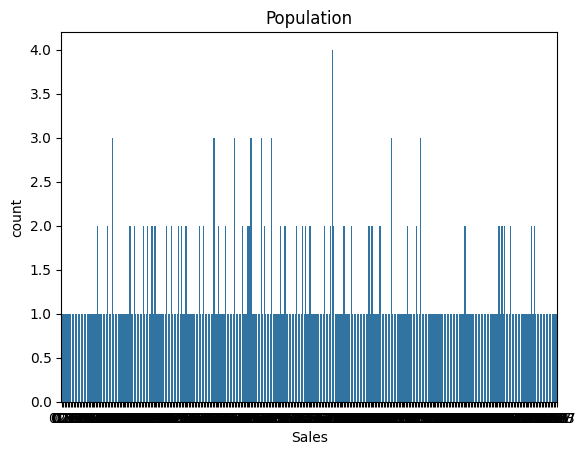

In [19]:
sns.countplot(x='Sales', data=df)
plt.title('Population')
plt.show()

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    object 
 6   ShelveLoc    399 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    object 
 9   Urban        400 non-null    object 
 10  US           397 non-null    object 
dtypes: float64(1), int64(5), object(5)
memory usage: 34.5+ KB


In [21]:
df = df.drop(columns=['ShelveLoc']) 

In [22]:
df.isnull().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
Age            0
Education      0
Urban          0
US             3
dtype: int64

# Hammasini tozalash

In [23]:
for col in df.columns:
    if df[col].isnull().sum()>0:
        if df[col].dtype=='object':
            df[col].fillna(df[col].mode()[0], inplace=True)
        else:
            df[col].fillna(df[col].mean(), inplace=True)

/var/folders/1p/wjjmstx57b73dwzmvlpmj7jr0000gn/T/ipykernel_42229/3774126143.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    object 
 6   Age          400 non-null    int64  
 7   Education    400 non-null    object 
 8   Urban        400 non-null    object 
 9   US           400 non-null    object 
dtypes: float64(1), int64(5), object(4)
memory usage: 31.4+ KB


# objectni int yoki floatga otkazish

In [25]:
categorical_col=df.select_dtypes(include=['object', 'category']).columns
label_encoder=LabelEncoder()
for col in categorical_col:
    df[col]=label_encoder.fit_transform(df[col])

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   Age          400 non-null    int64  
 7   Education    400 non-null    int64  
 8   Urban        400 non-null    int64  
 9   US           400 non-null    int64  
dtypes: float64(1), int64(9)
memory usage: 31.4 KB


# input va outputni ajratish

In [26]:
X = df.drop('US', axis=1)  
y = df['US']


# Step 1: Split into 70% training and 30% temp
# Step 2: Split the temp set into 50% validation and 50% test


In [27]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [28]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# k= 5 nearest neighbors

In [29]:
knn = KNeighborsClassifier(n_neighbors=5) 
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [30]:
y_pred = knn.predict(X_test)

In [31]:
print(f'Accuracy: {accuracy_score(y_test, y_pred):.2f}')

Accuracy: 0.80


# Confusion Matrix

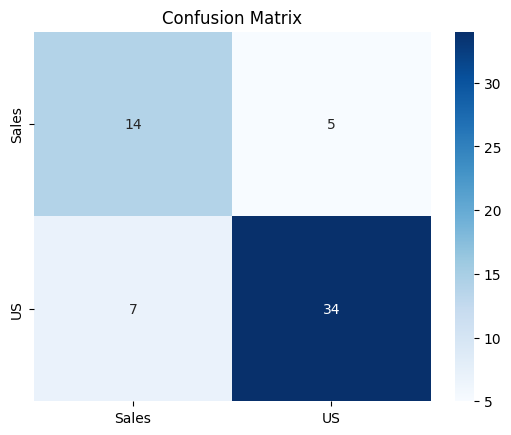

In [35]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Sales', 'US'], yticklabels=['Sales', 'US'])
plt.title('Confusion Matrix')
plt.show()

# Classification Report

In [36]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.67      0.74      0.70        19
           1       0.87      0.83      0.85        41

    accuracy                           0.80        60
   macro avg       0.77      0.78      0.77        60
weighted avg       0.81      0.80      0.80        60



# k-fold K=10

In [38]:

cv_scores = cross_val_score(knn, X, y, cv=10)

In [39]:
# Print the results of cross-validation
print(f'Cross-validation scores for each fold: {cv_scores}')
print(f'Mean accuracy from cross-validation: {cv_scores.mean():.2f}')
print(f'Standard deviation of cross-validation scores: {cv_scores.std():.2f}')

Cross-validation scores for each fold: [0.525 0.675 0.5   0.575 0.6   0.6   0.55  0.675 0.625 0.6  ]
Mean accuracy from cross-validation: 0.59
Standard deviation of cross-validation scores: 0.05


In [40]:
scaler_x = StandardScaler()

In [41]:
X = scaler.fit_transform(X)

# k-fold K=10

In [42]:
cv_scores = cross_val_score(knn, X, y, cv=10) 

In [43]:
 cv_scores

array([0.75 , 0.725, 0.675, 0.775, 0.675, 0.75 , 0.825, 0.8  , 0.8  ,
       0.775])

# Print the results of cross-validation

In [44]:
print(f'Cross-validation scores for each fold: {cv_scores}')
print(f'Mean accuracy from cross-validation: {cv_scores.mean():.2f}')
print(f'Standard deviation of cross-validation scores: {cv_scores.std():.2f}')

Cross-validation scores for each fold: [0.75  0.725 0.675 0.775 0.675 0.75  0.825 0.8   0.8   0.775]
Mean accuracy from cross-validation: 0.76
Standard deviation of cross-validation scores: 0.05


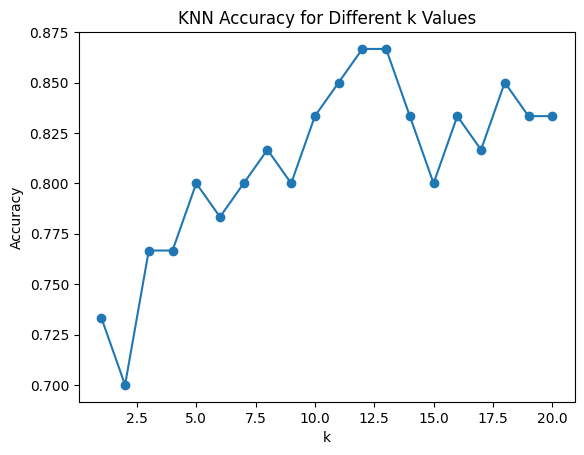

In [46]:
k_values = range(1, 21)
accuracy_list = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    accuracy_list.append(accuracy_score(y_test, knn.predict(X_test)))

plt.plot(k_values, accuracy_list, marker='o')
plt.title('KNN Accuracy for Different k Values')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.show()